In [ ]:
import matplotlib.pyplot as plt
import random

In [1]:
import pandas as pd

In [2]:
import cv2

In [4]:
from typing import List

1, 2 пункты

In [18]:
df = pd.read_csv('paths.csv', delimiter=',', usecols = (0, 2), names = ('AbsPath', 'Name'))

In [19]:
df.head()

,AbsPath,Name
0,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear
1,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear
2,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear
3,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear
4,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear


3 пункт

In [28]:
df['Class'] = df['Name'].apply(lambda name: 0 if name == 'polarbear' else 1)

In [29]:
df.head()

,AbsPath,Name,Class
0,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0
1,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0
2,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0
3,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0
4,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0


4 пункт

In [32]:
df['Height'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[0])

In [33]:
df['Width'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[1])

In [34]:
df['Channel'] = df['AbsPath'].apply(lambda path: cv2.imread(path).shape[2])

In [35]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel
0,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,2000,3000,3
1,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1282,1920,3
2,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1000,1500,3
3,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1800,2700,3
4,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,2000,3000,3


5 пункт

In [36]:
df[df['Class'] == 0]['Height'].describe()

count    1003.000000
mean     1196.925224
std       478.634428
min       442.000000
25%       819.000000
50%      1080.000000
75%      1365.500000
max      3000.000000
Name: Height, dtype: float64

In [37]:
df[df['Class'] == 1]['Height'].describe()

count    1003.000000
mean     1186.953141
std       499.971271
min       333.000000
25%       800.000000
50%      1080.000000
75%      1378.500000
max      3000.000000
Name: Height, dtype: float64

In [38]:
df[df['Class'] == 0]['Width'].describe();

In [39]:
df[df['Class'] == 1]['Width'].describe();

In [40]:
df[df['Class'] == 0]['Channel'].describe();

In [41]:
df[df['Class'] == 1]['Width'].describe();

6 пункт

In [219]:
def split_class(data: pd.DataFrame, class_name: int) -> pd.DataFrame:
    """
    Возвращает датафрейм, состоящий из строк, для которых значение метки соответствует заданному
    Parameters
    ----------
    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    Returns
    -------
    pd.Dataframe
    Отфильтрованный датафрейм
    """
    new_data = data[data['Class'] == class_name]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [222]:
df_0 = split_class(df, 0) 
df_1 = split_class(df, 1)

In [225]:
df_1.head()

,AbsPath,Name,Class,Height,Width,Channel,Pixels
0,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,brownbear,1,1285,1920,3,7401600
1,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,brownbear,1,700,1120,3,2352000
2,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,brownbear,1,1800,2880,3,15552000
3,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,brownbear,1,1050,1680,3,5292000
4,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,brownbear,1,1200,1920,3,6912000


7 пункт

In [226]:
def split_shape(data: pd.DataFrame, class_name: int, max_height: int, max_width: int) -> pd.DataFrame:
    """
    Возвращает датафрейм, отфильтрованный по заданным параметрам
    Parameters
    ----------
    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    max_height: int
      Верхняя граница диапазона для высоты
    max_width: int
      Верхняя граница диапазона для ширины
    Returns
    -------
    pd.Dataframe
    Отфильтрованный датафрейм
    """
    new_data = data[(data['Class'] == class_name) & (data['Height'] <= max_height) & (data['Width'] <= max_width)]
    new_data.reset_index(drop=True, inplace=True)
    return new_data

In [227]:
df_0_filter = split_shape(df, 0, 1100, 1400)

In [230]:
df_0_filter['Width'].max()

1400

8 пункт

In [231]:
df['Pixels'] = df['Height'] * df['Width'] * df['Channel']

In [232]:
df.head()

,AbsPath,Name,Class,Height,Width,Channel,Pixels
0,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,2000,3000,3,18000000
1,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1282,1920,3,7384320
2,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1000,1500,3,4500000
3,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,1800,2700,3,14580000
4,C:\Users\WWolk\Desktop\DataProcessing\dataset\...,polarbear,0,2000,3000,3,18000000


In [233]:
for class_name, sub_df in df.groupby("Class"):
    print(f'Class: {class_name}')
    print(f'Max: {sub_df.Pixels.max()}')
    print(f'Min: {sub_df.Pixels.min()}')
    print(f'Mean: {sub_df.Pixels.mean()}')
    print('-----------------------------')


Class: 0
Max: 26676000
Min: 1080000
Mean: 6915516.681954138
-----------------------------
Class: 1
Max: 27000000
Min: 499500
Mean: 6884470.944167498
-----------------------------


9 пункт

In [236]:
def get_gists(data: pd.DataFrame, class_name: int) -> List[List[int]]:
    """
    Возвращает 3 массива значений гистограммы по каждому каналу(b, g, r)
    Parameters
    ----------
    data: pd.DataFrame
      Исходный датафрейм
    class_name : int
      Метка класса
    Returns
    -------
    list
    Массивы значений
    """
    class_data = split_class(data, class_name)
    image = cv2.imread(class_data[class_data['Class'] == class_name]['AbsPath'][random.randint(0, 1002)])
    hists = []
    for i in range(3):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        hists.append(hist)
    return hists

10 пункт

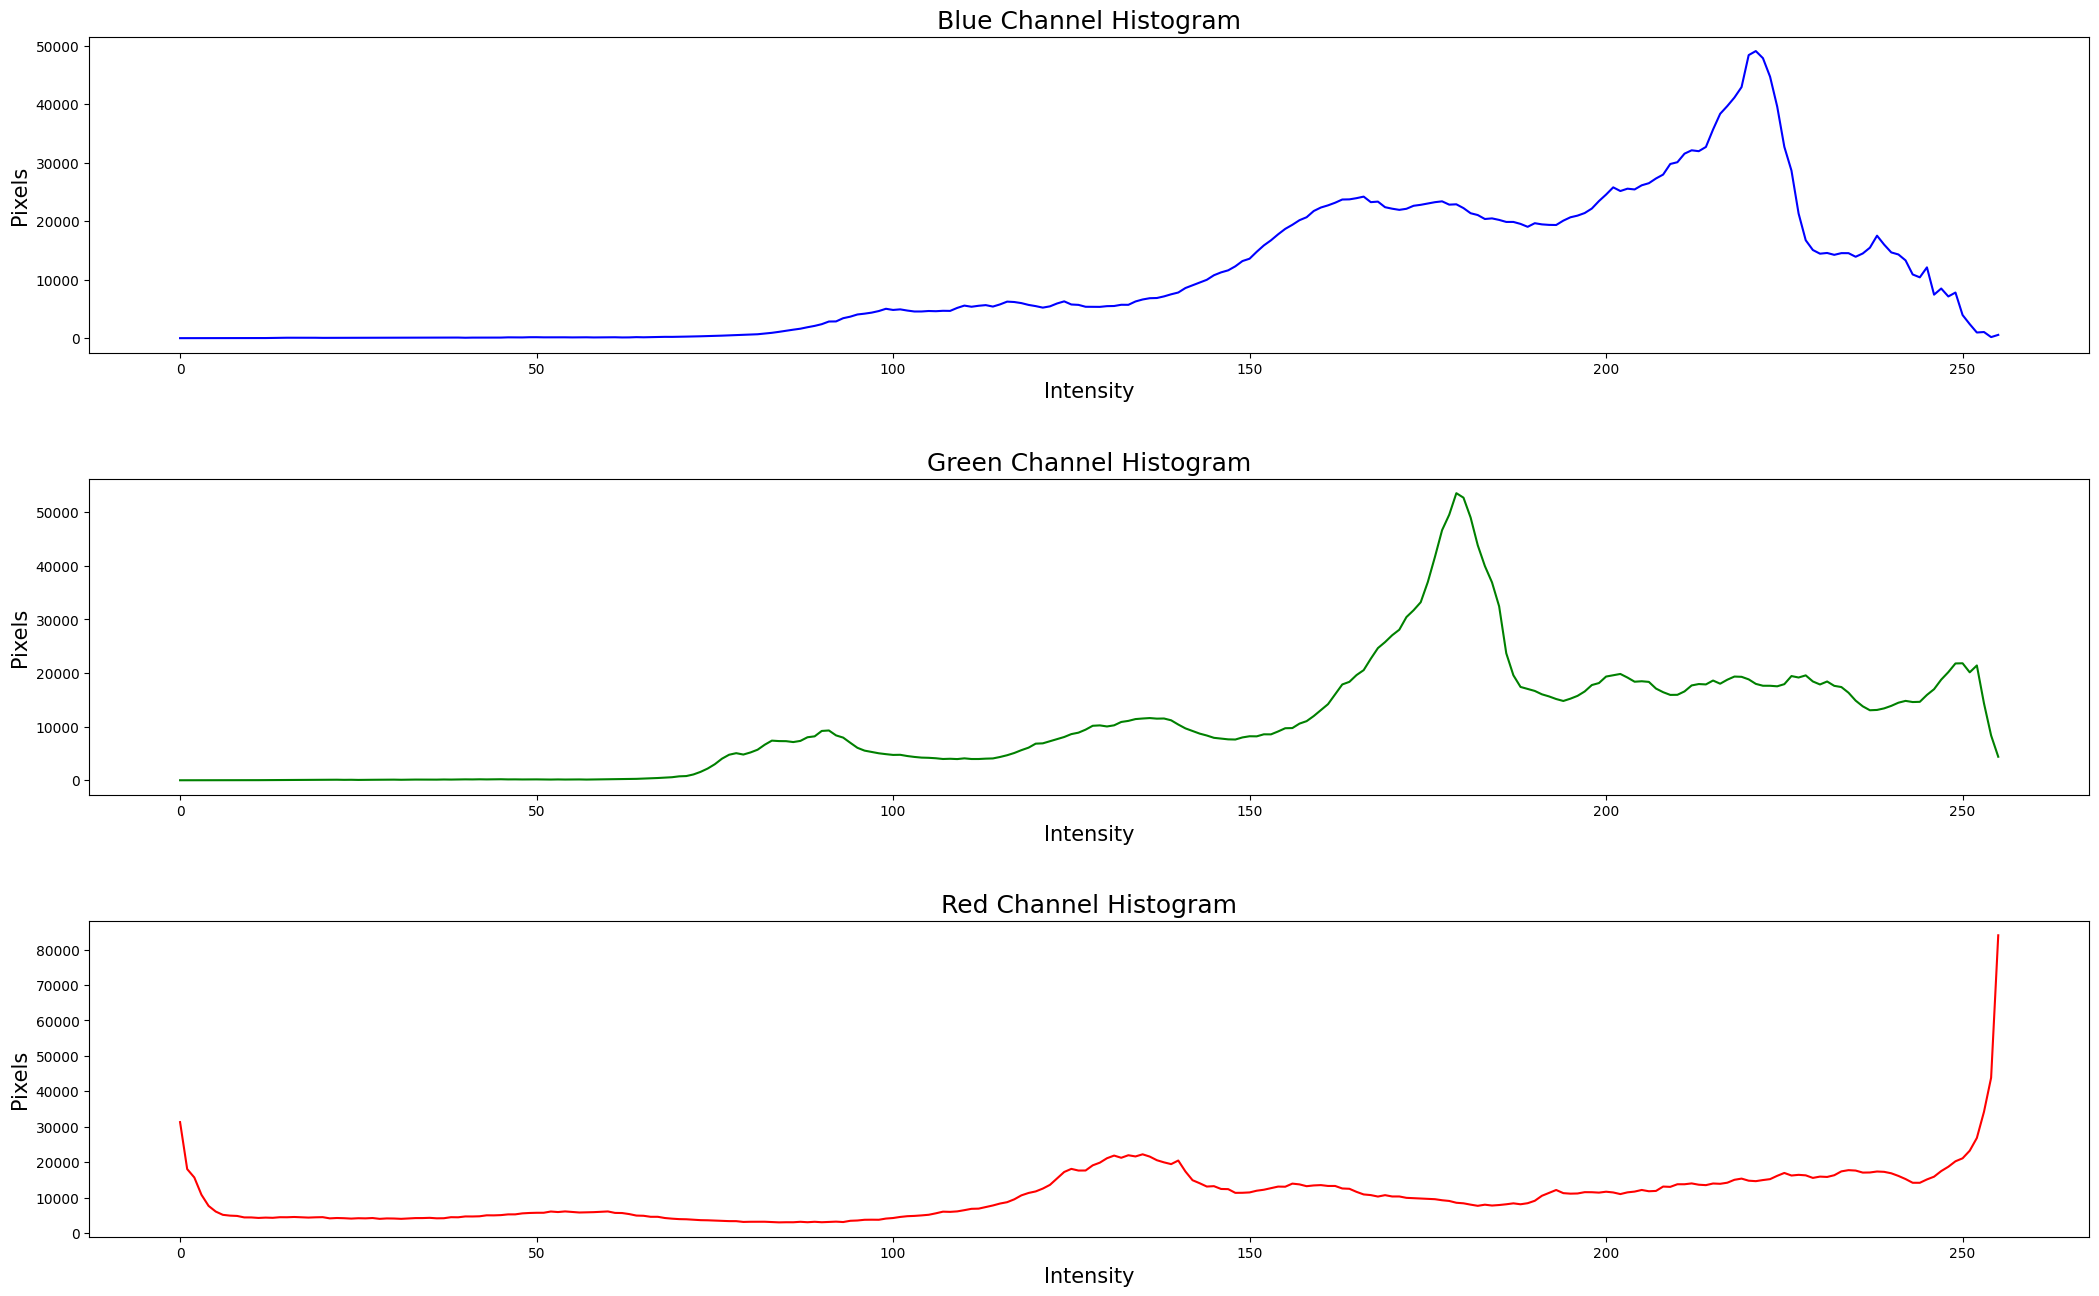

In [240]:
hists = get_gists(df, 0)

fig = plt.figure(figsize=(25, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

fig.add_subplot(3, 1, 1)
plt.title('Blue Channel Histogram', fontsize = 18)
plt.plot(hists[0], color = 'b')
#plt.hist(hists[0], color='b')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(3, 1, 2)
plt.title('Green Channel Histogram', fontsize = 18)
plt.plot(hists[1], color = 'g')
#plt.hist(hists[1], color='g')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

fig.add_subplot(3, 1, 3)
plt.title('Red Channel Histogram', fontsize = 18)
plt.plot(hists[2], color = 'r')
#plt.hist(hists[2], color='r')
plt.xlabel('Intensity', fontsize = 15)
plt.ylabel('Pixels', fontsize = 15)

plt.show()